# Analisis Data Zuber

Anda bekerja sebagai seorang analis untuk Zuber, sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago. Tugas Anda adalah untuk menemukan pola pada informasi yang tersedia. Anda ingin memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan. Dengan menggunakan basis data, Anda akan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan.

## Tujuan

Proyek ini berfokus pada analisis data perusahan taksi. Data sebelumnya telah dilakukan pre-processing untuk membersihkan dan merapihkan data agar dapat diolah. Data yang diperoleh diolah dengan SQL. Untuk analisis ini, selanjutnya dilakukan Exploratory Data Analysis (EDA) dan Data Visualization untuk mengetahui insight dari data. Dan terakhir dilakukan analisis data statistik untuk Hypothesis Testing.

### Hipotesis

1. Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan.

### Tahapan

Data tentang hasil SQL disimpan dalam file:
* `/datasets/project_sql_result_01.csv`
* `/datasets/project_sql_result_04.csv`
* `/datasets/project_sql_result_07.csv`

Proyek ini terdiri dari dua tahap:

1. Analisis Data Exploratif (EDA)
2. Analisis Data Statistik (Hyphothesis Testing)


## 1. Analisis Data Exploratif (EDA)

**Import *library* yang dibutuhkan:**

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

### 1.1. Memuat Data

In [2]:
# Try and except datasets
try:
    company_data = pd.read_csv('moved_project_sql_result_01.csv')
    dropoff_data = pd.read_csv('moved_project_sql_result_04.csv')
    travel_data = pd.read_csv('moved_project_sql_result_07.csv')
except:
    company_data = pd.read_csv('/datasets/project_sql_result_01.csv')
    dropoff_data = pd.read_csv('/datasets/project_sql_result_01.csv')
    travel_data = pd.read_csv('/datasets/project_sql_result_01.csv')

### 1.2. Mengeksplorasi Data Awal

#### **Data Perusahaan**

In [3]:
company_data

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


**Deskripsi company_data**: 


- `company_name` — nama perusahaan taksi
- `trips_amount` —  jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017

In [4]:
# Check data info
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# Check statistics data
company_data.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


#### **Data Dropoff Location**

In [7]:
dropoff_data

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


**Deskripsi dropoff_data**: 


- `dropoff_location_name` — nama wilayah di Chicago tempat perjalanan berakhir
- `average_trips` —  jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017

In [8]:
# Check data info
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
# Check statistics data
dropoff_data.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [10]:
# Check duplicated data
dropoff_data.duplicated().sum()

0

### 1.3. Mempelajari Parameter Inti 

#### Identifikasi 10 wilayah teratas

In [11]:
top_ten = dropoff_data.sort_values(by='average_trips', ascending=False).head(10)
top_ten

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


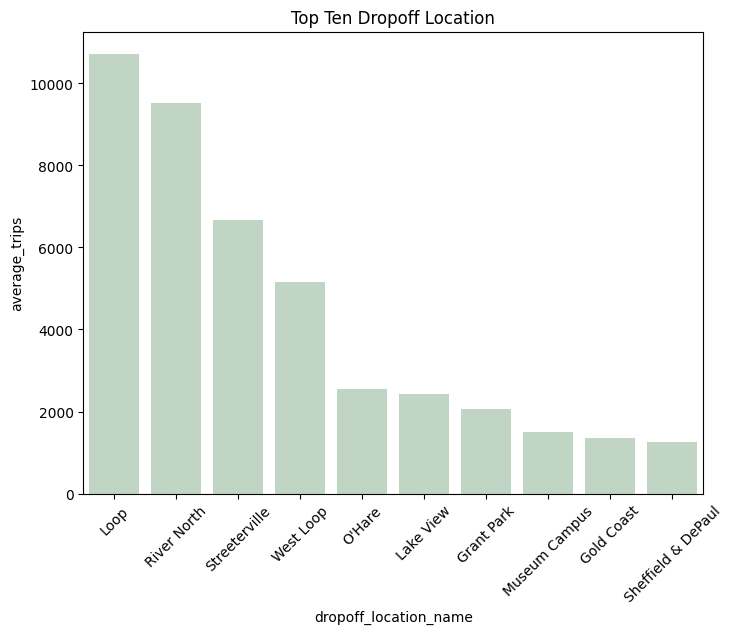

In [12]:
# Create a bar plot
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.barplot(x="dropoff_location_name", y="average_trips", data=top_ten, color='#BCD8C1')
plt.title('Top Ten Dropoff Location')
plt.show()

**Kesimpulan sementara:**

* Sepuluh dropoff location yang memiliki rata-rata perjalanan tertinggi yaitu di lokasi Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, dan Sheffield & DePaul.

#### Grafik Perusahaan Taksi

In [13]:
company_data.head(20)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


* Untuk mempermudah analisa, perusahaan tertinggi yang akan diambil yaitu perusahaan dengan perjalanan yang diatas 5000.

In [14]:
top_company = company_data.sort_values(by='trips_amount', ascending=False).head(11)

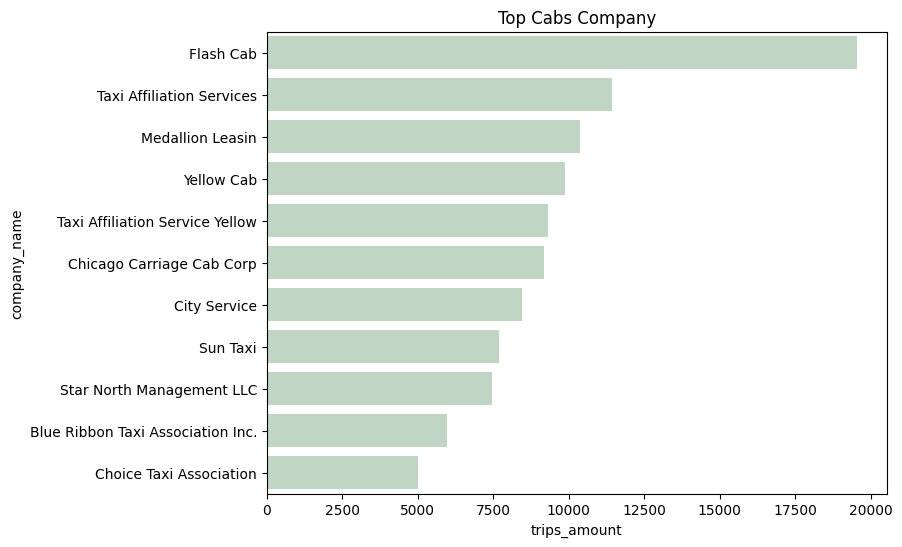

In [15]:
# Create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x="trips_amount", y="company_name", data=top_company, color='#BCD8C1')
plt.title('Top Cabs Company')
plt.show()

**Kesimpulan:**

* Perusahaan tertinggi yaitu Flash Cab dengan jumlah perjalanan 19558 perjalanan. Kemudian Taxi Affiliation Services dengan 11422 perjalanan. Kemudian Medallion Leasin dengan 10367 perjalanan dan Yellow Cab dengan 9888 perjalanan.

## 2. Analisis Data Statistik (Hypothesis Testing)

### 2.1. Mengeksplorasi Data Perjalanan dari Loop ke Bandara Internasional O'Hare

**Hipotesis:**

**Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan.**

Sebelum menguji perlu ditemukan data-data yang mendukung hipotesis tersebut.

In [16]:
travel_data

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


**Deskripsi travel_data**: 

- `start_ts` — tanggal dan waktu penjemputan
- `weather_conditions` —  kondisi cuaca saat perjalanan dimulai
- `duration_seconds` —  durasi perjalanan dalam satuan detik

In [17]:
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


data pada kolom start_ts diubah menjadi datetime dan menambahkan beberapa kolom baru

In [26]:
# Cast 'start_ts' column to datetime
travel_data['start_ts'] = pd.to_datetime(travel_data['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
travel_data['start_date'] = travel_data['start_ts'].dt.date
travel_data['start_time'] = travel_data['start_ts'].dt.time
travel_data['start_day'] = travel_data['start_ts'].dt.day_name()

In [27]:
travel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   start_date          1068 non-null   object        
 4   start_time          1068 non-null   object        
 5   start_day           1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 50.2+ KB


In [28]:
#creates slice for the weather condition that "Good" 
good_weather = travel_data.query('weather_conditions == "Good"')

In [29]:
#creates slice for the weather condition that "Bad" 
bad_weather = travel_data.query('weather_conditions == "Bad"')

In [30]:
travel_data

,start_ts,weather_conditions,duration_seconds,start_date,start_time,start_day
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25,16:00:00,Saturday
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25,14:00:00,Saturday
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25,12:00:00,Saturday
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04,10:00:00,Saturday
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11,07:00:00,Saturday
...,...,...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,2017-11-25,11:00:00,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,2017-11-11,10:00:00,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,2017-11-11,13:00:00,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,2017-11-11,08:00:00,Saturday


### 2.2. Menguji Hipotesis

**Hipotesis:**

**Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan.**

Dalam uji variansi, jika rasio sampel dengan varians yang lebih besar dibandingkan dengan sample yang variansnya lebih kecil <4, maka bisa kita assumsikan varians keduanya setara. Atau bisa menggunakan uji levene dimana H0 nya adalah kedua grup memiliki varians setara dan H1 nya adalah kedua grup memiliki varians yang berbeda. Jika di hasil levene test menunjukkan p-value < dari critical value (alpha) maka kita bisa menolak H0, dan sebaliknya.

In [31]:
# Create a sample for levene test
sample_1 = good_weather['duration_seconds']
sample_2 = bad_weather['duration_seconds']

In [32]:
# Levene test
st.levene(sample_1, sample_2)

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

Dikarenakan p-value > dari critical value (alpha = 0.05) maka kita tidak bisa menolak H0 dan kedua sampel dianggap memiliki varians yang sama (equal_var = True)

* H0 (Null Hypothesis) : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare sama pada hari-hari Sabtu yang hujan.
* H1 (Alternative Hypothesis) : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan.

In [33]:
# ttest_ind for sample 1 and 2
alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  6.517970327099473e-12
Kita menolak hipotesis nol


**Kesimpulan:**

* Hasil yang didapat dari uji hipotesis yaitu Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan adalah **BENAR**.

## Kesimpulan Umum

#### A. Analisis Data Esksploratif (EDA)

Dari hasil analisis data esksploratif, dapat disimpulkan bahwa:
1. Data sudah dilakukan pra-pemrosesan data dengan SQL, sehingga data yang diperoleh sudah bersih dan rapih.
2. Wilayah dengan rata-rata perjalanan yang paling tinggi yaitu di lokasi Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, dan Sheffield & DePaul.
3. Perusahaan taksi yang paling banyak melakukan perjalanan yaitu Flash Cab. Kemudian Taxi Affiliation Services dan Medallion Leasin.

#### B. Analisis Data Statistik (Hypothesis Testing)

Dari hasil analisis pengujian hipotesis, dapat disimpulkan bahwa:
1. Hasil yang didapat dari uji hipotesis yaitu Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan adalah benar.